# Lending Club Case Study:

- Define Problem Statement
- Background - why is it important to solve this problem
- Approach to solve this

### Import libraries


In [8]:
#Importing libraries needed for this EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
#Setting environment variables
sns.set_style("dark")
plt.style.use("tableau-colorblind10")
warnings.filterwarnings("ignore")

## 1.) Data Sourcing / Gathering & Understanding:

In [10]:
#extract data from csv file
loan_df = pd.read_csv('loan.csv')
loan_df.shape # check shape to know how many rows and columns have been loaded into the dataframe

(39717, 111)

In [11]:
#inspect sample rows
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Refer to data dictionary to decide which columns are needed and which can be removed
 - list of columns, data dictionary definition

In [12]:
#Remove data not in scope of our analysis
post_loan_data_points = ['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int'
                         ,'total_rec_late_fee','pymnt_plan','out_prncp','out_prncp_inv'
                        ,'last_pymnt_d','last_pymnt_amnt']

loan_df.drop(labels = post_loan_data_points, axis =1, inplace = True)

loan_df.shape # check shape to know how many rows and columns have been loaded into the dataframe

(39717, 101)

In [13]:
# target variables of interest
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [14]:
loan_df = loan_df[loan_df.loan_status !='Current']
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## 2.) Data Handling & Cleaning
 - data cleaning: missing vaslues, tratment, check high % of missing values, drop rows, clumns, impute (try to explain in documentation so the grader can understand)
 - outliers, treatment,
 - derived variables, transformations, % metrics?\
 - data types

In [15]:
#check columns and null counts
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 101 entries, id to total_il_high_credit_limit
dtypes: float64(66), int64(13), object(22)
memory usage: 30.0+ MB


**Finding:** There are several columns which have 0 non-null values

In [16]:
#Removing columns with 0 non null values
loan_df.dropna(axis = 1, how = 'all',inplace = True)

#Removing rows with 0 non null values
loan_df.dropna(axis = 0, how = 'all',inplace = True)

#Checking after removing
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [17]:
# % of missing values in mising value columns
cols_50null = loan_df.isnull().mean().round(4).sort_values( ascending = False)*100
cols_50null[cols_50null.values > 0]

mths_since_last_record        92.90
mths_since_last_delinq        64.56
desc                          32.47
emp_title                      6.19
emp_length                     2.68
pub_rec_bankruptcies           1.81
chargeoff_within_12_mths       0.15
collections_12_mths_ex_med     0.15
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

Missing data is in these columns:
 - desc
 - emp_title 
 - emp_length
 - pub_rec_bankruptcies 
 - collections_12_mths_ex_med 
 - chargeoff_within_12_mths 
 - revol_util 
 - tax_liens 
 - title 
 - last_credit_pull_d 

In [18]:
#Removing columns with nulls greater than 50 perc
cols_drop1 = cols_50null[cols_50null.values > 50]
loan_df.drop(columns=cols_drop1.index, inplace=True)

In [19]:
#Checking after removing
loan_df.shape

(38577, 44)

In [20]:
#Check value range for column to remove columns with single value
cols_uniquevals=loan_df.nunique().sort_values()
cols_uniquevals

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_credit_pull_d              106
int_rate                        370
earliest_cr_line                524
zip_code                    

In [21]:
#Removing columns with single values
cols_drop2 = cols_uniquevals[cols_uniquevals.values == 1]
loan_df.drop(columns=cols_drop2.index,inplace=True)

In [22]:
#Checking after removing
loan_df.shape

(38577, 36)

In [23]:
# Remaining perc of missing values
loan_df.isnull().mean().round(4).sort_values( ascending = False)

desc                       0.3247
emp_title                  0.0619
emp_length                 0.0268
pub_rec_bankruptcies       0.0181
revol_util                 0.0013
title                      0.0003
last_credit_pull_d         0.0001
term                       0.0000
collection_recovery_fee    0.0000
recoveries                 0.0000
total_acc                  0.0000
revol_bal                  0.0000
pub_rec                    0.0000
open_acc                   0.0000
inq_last_6mths             0.0000
earliest_cr_line           0.0000
delinq_2yrs                0.0000
dti                        0.0000
addr_state                 0.0000
zip_code                   0.0000
funded_amnt_inv            0.0000
purpose                    0.0000
member_id                  0.0000
url                        0.0000
loan_status                0.0000
issue_d                    0.0000
verification_status        0.0000
annual_inc                 0.0000
home_ownership             0.0000
loan_amnt     

### Remaining Missing Data

Missing data is in these columns:
- desc                       32.47
- emp_title                   6.19
- emp_length                  2.68
  - Impute using median
- pub_rec_bankruptcies        1.81
  - Impute using median

Below can be ignored:
- revol_util                  0.13
- title                       0.03
- last_credit_pull_d          0.01


### Impute missing Data

##### 1) Impute emp_length

In [24]:
# Check
loan_df.emp_length.value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: emp_length, dtype: int64

In [25]:
#Replace the nulls with the Mode
loan_df['emp_length'] = loan_df.emp_length.fillna(loan_df.emp_length.mode()[0])

#check
loan_df.emp_length.value_counts(dropna=False)

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### 2) Impute pub_rec_bankruptcies

In [26]:
# Check
loan_df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    36238
1.0     1637
NaN      697
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
#Replace the nulls with the Mode
loan_df['pub_rec_bankruptcies'] = loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0])

#check
loan_df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [28]:
# Check Final left out missing values the dataset
cols_50null = loan_df.isnull().mean().round(4).sort_values( ascending = False)*100
cols_50null[cols_50null.values > 0]

desc                  32.47
emp_title              6.19
revol_util             0.13
title                  0.03
last_credit_pull_d     0.01
dtype: float64

### Drop duplicate records if any

In [29]:
# Drop Duplicate row if any?
loan_df.drop_duplicates()
loan_df.shape

(38577, 36)

### Format Data

In [30]:
# Check format
loan_df[['term','int_rate','revol_util']].head()

,term,int_rate,revol_util
0,36 months,10.65%,83.70%
1,60 months,15.27%,9.40%
2,36 months,15.96%,98.50%
3,36 months,13.49%,21%
5,36 months,7.90%,28.30%


#### 1) Format Term, remove trail character months

In [31]:
# Format term, remove trailing months
loan_df['term']=loan_df.term.str.replace(' months','')
loan_df['term']=loan_df.term.str.strip().astype(int)
#Check transformed format
loan_df.term.unique()

array([36, 60])

In [32]:
#### 2) Format int_rate, remove trailing %

In [33]:
# Format term, remove trailing %
loan_df['int_rate']=loan_df['int_rate'].str.replace('%','').astype(float)

# Check format
loan_df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [34]:
#### 3) Format revol_util, remove trailing %

In [35]:
# Format term, remove trailing %
loan_df['revol_util']=loan_df['revol_util'].str.replace('%','').astype(float)

# Check format
loan_df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

# 3.) Exploratory Analysis & Data Visualisation 
- univariates,
- bivariates, 
- derived variables, 
- % metric,
- types of visuals

In [36]:
# Target variable
loan_df['Default_flag'] = loan_df.loan_status.apply(lambda x : 1 if x == 'Charged Off' else 0)
#check
loan_df.Default_flag.value_counts()

0    32950
1     5627
Name: Default_flag, dtype: int64

In [37]:
# Target variable Yes/No
loan_df['Default_YesNo'] = loan_df.loan_status.apply(lambda x : 'Yes' if x == 'Charged Off' else 'No')
#check
loan_df.Default_YesNo.value_counts()

No     32950
Yes     5627
Name: Default_YesNo, dtype: int64

### Analysing Categorical variables

In [38]:
# List of all categorical variables we wold like to analyse
categ_var_list = ['emp_length','term','grade','sub_grade', 'home_ownership'
            ,'verification_status','delinq_2yrs', 'open_acc','pub_rec_bankruptcies']

In [39]:
# Define function to plot distribution of cateogrical variables and the default rate by each of the categ variables
def plot_categ(df,var_list,figsize=[10,7]):
    
    for var in var_list:
        
        plt.figure(figsize=figsize)
        sns.countplot(x=loan_df[var])
        plt.title(("Distribution of " + var), fontsize=12)
        plt.show()


        plt.figure(figsize=figsize)
        sns.barplot(x=df[var], y=df['Default_flag'], palette = 'hls')
        plt.title("Default Rate by " + var, fontsize=12)
        plt.show()

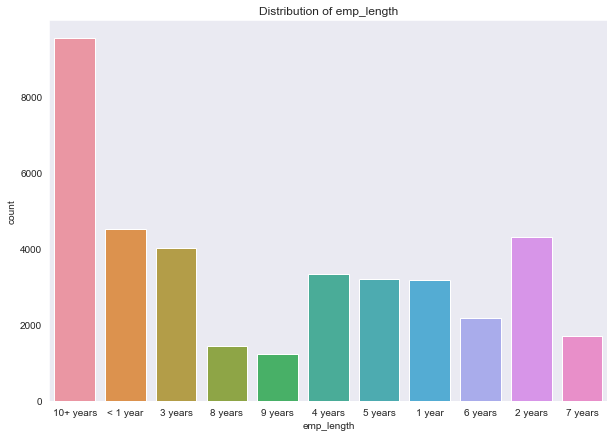

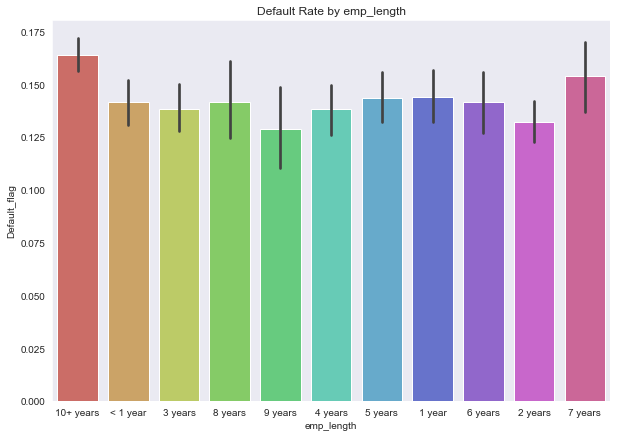

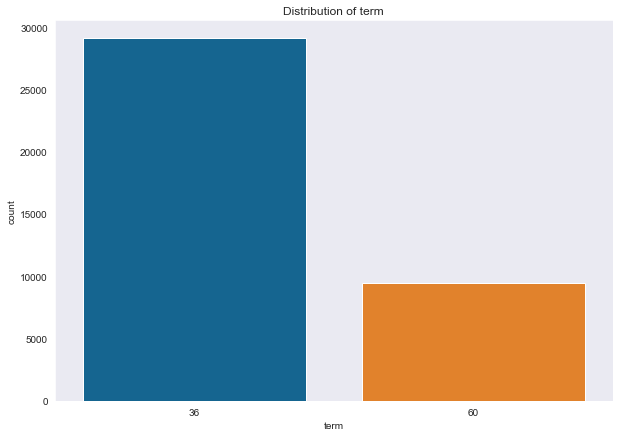

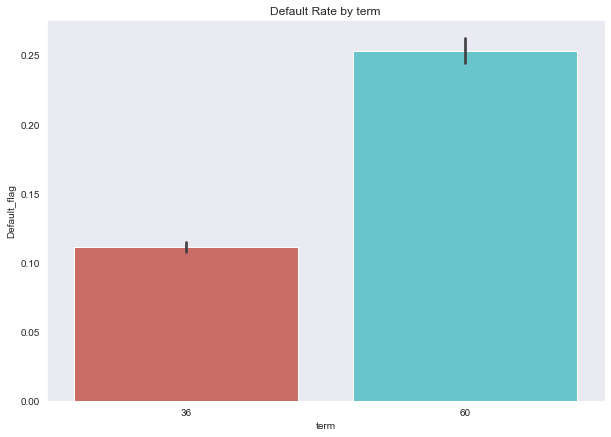

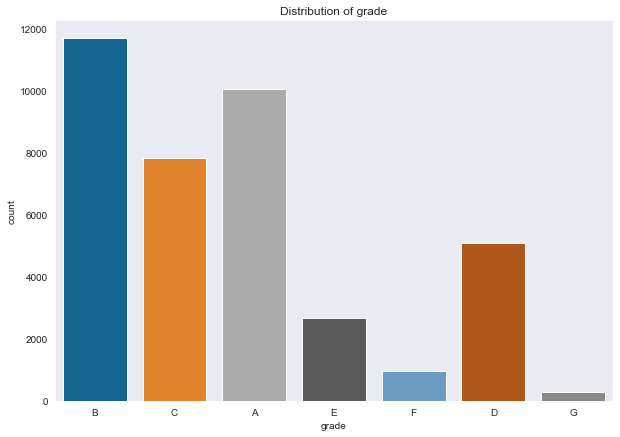

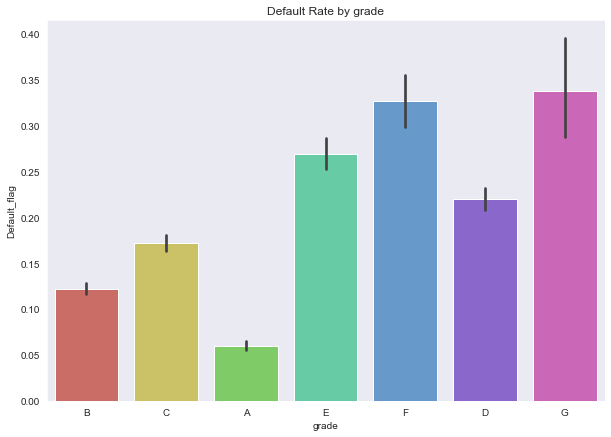

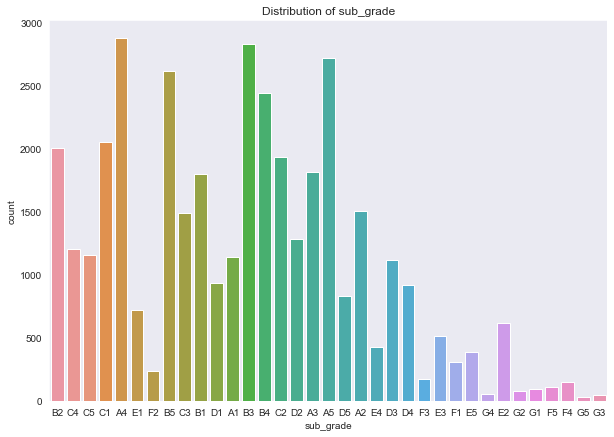

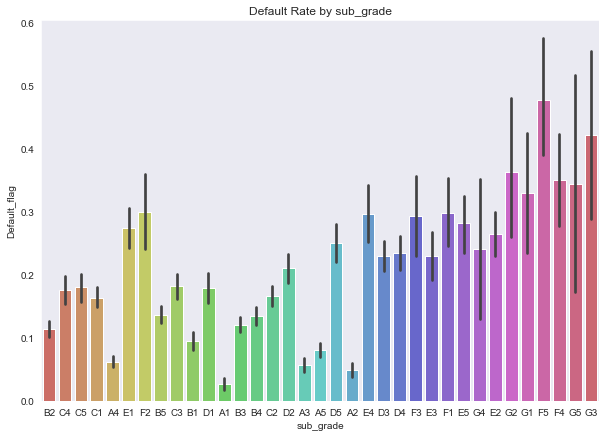

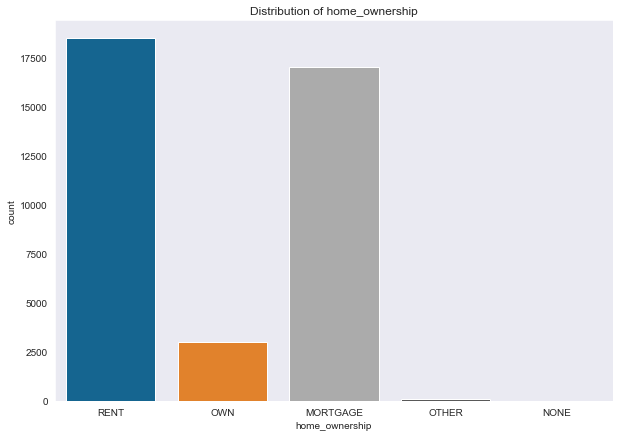

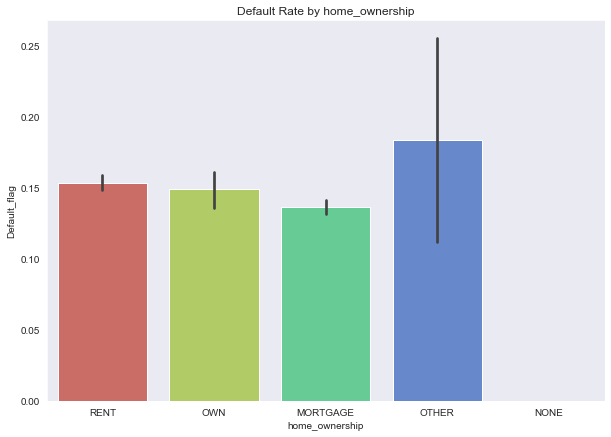

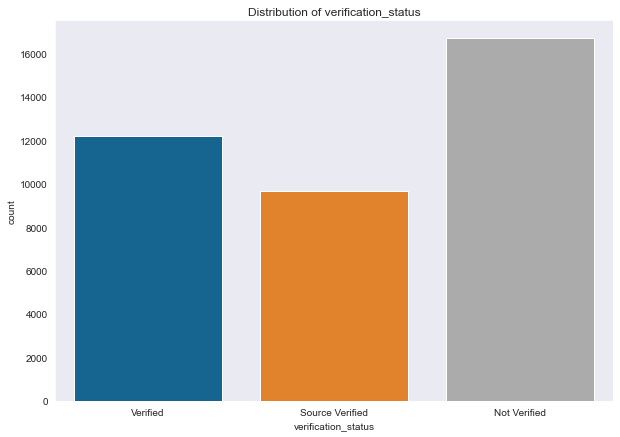

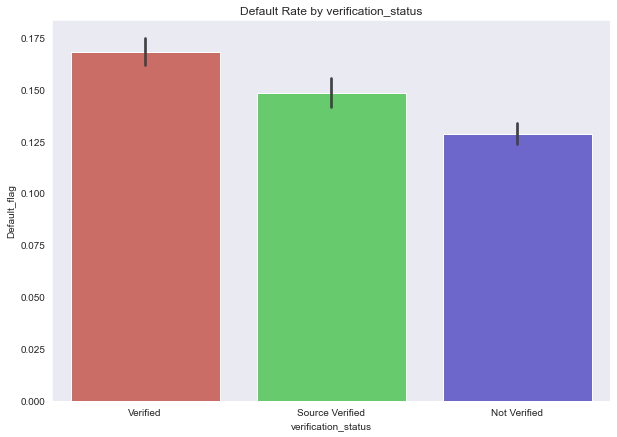

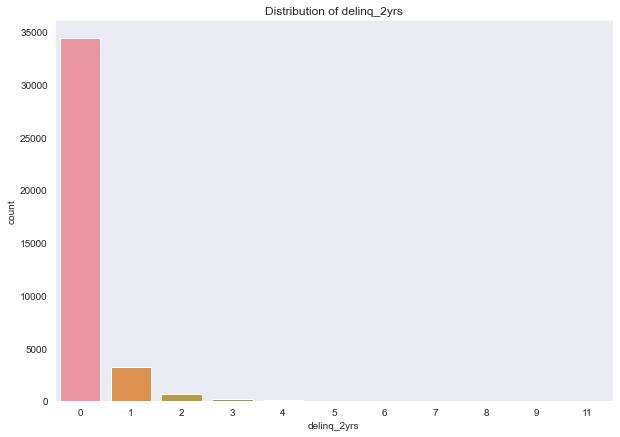

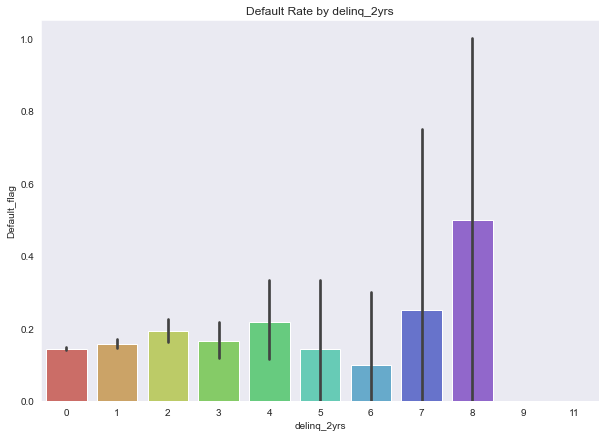

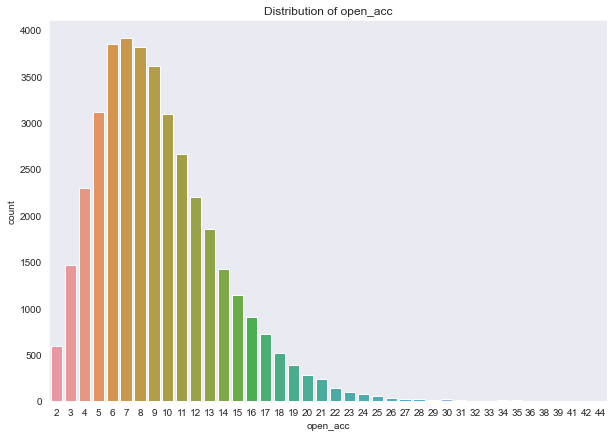

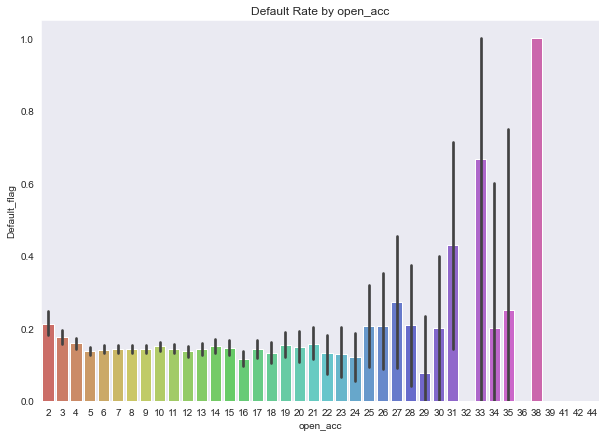

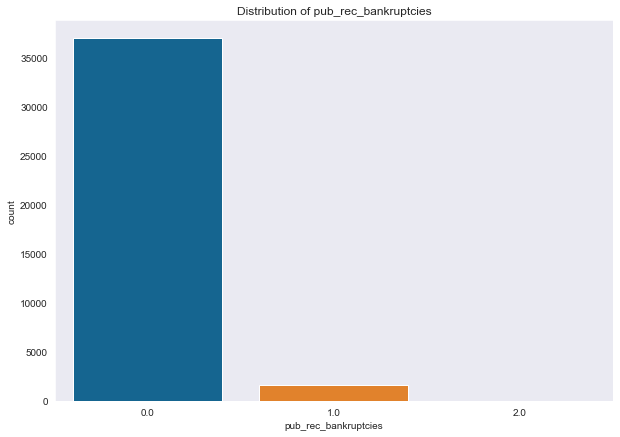

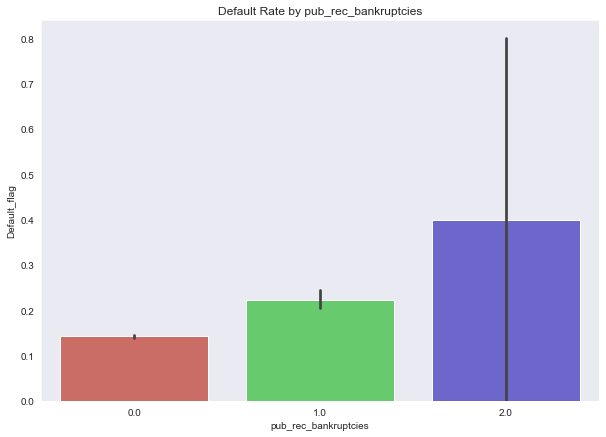

In [40]:
plot_categ(df = loan_df, var_list=categ_var_list)

### Analysing Numerical variables


In [42]:
num_var_list = ['loan_amnt','annual_inc','int_rate','installment','dti']

In [43]:
def num_plot(df, var_list):
    for var in var_list:
        sns.displot(df[var])
        plt.title(("Distribution of " + var), fontsize=12)
        plt.show()

        sns.boxplot(y = df[var],x = df['Default_flag']
           ,palette='hls')
        plt.title(("Box plot & Variation between Default Flag and " + var), fontsize=12)
        plt.show()


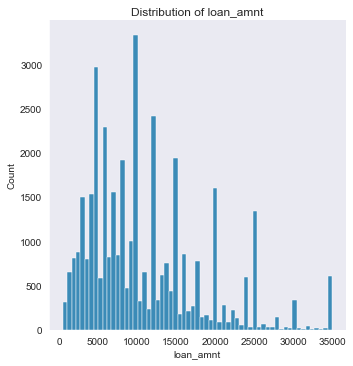

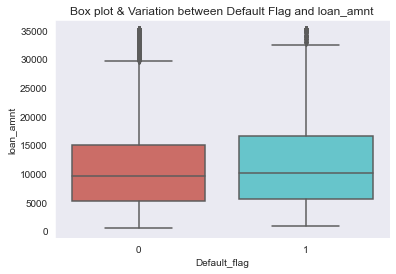

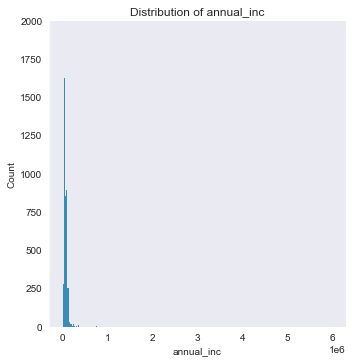

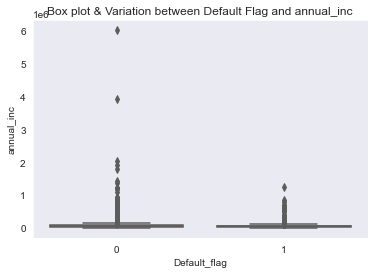

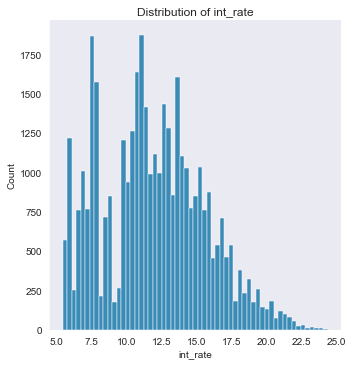

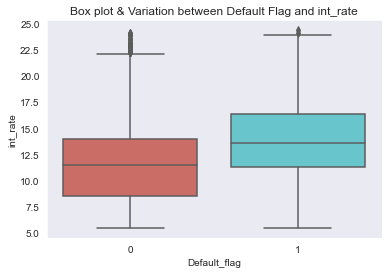

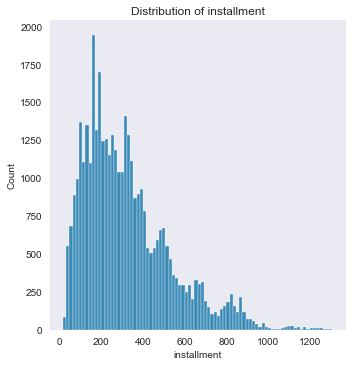

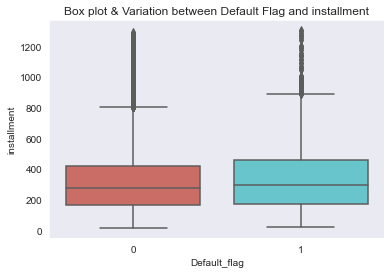

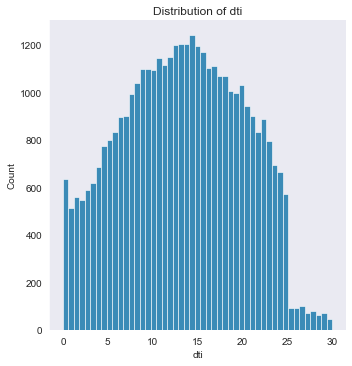

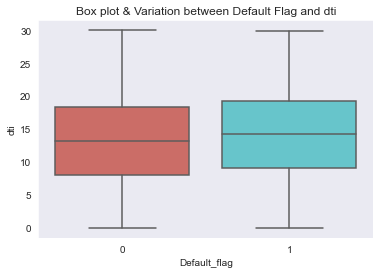

In [44]:
num_plot(df =loan_df, var_list = num_var_list)

## 4.) Findings/Results/Insights/Summary/Recommendations

Notes from our chat:
    
- Cleaning:
    - complete imputing missing values for all
    - fixing formats (intrest rate, )
    - outliers?
    
- Analysis:
    - Continuous variables - box plot Vs Default Flag;
    - Continuous variables - binning and then mean of default flag
    - Categorical variable - box plot and plot mean of default flag

- Create new Derived variables?   

- first cut of vars to try:
    - loan_amnt
    - term
    - int_rate
    - installment
    - grade & subgrade
    - purpose
    - title?
    - application_type

   -  emp length
    - home_owner
    - annual_inc
    - verification status & annual inc (try bivariate heat map)
    - addr_state
    - dti
    - delinq_2yrs
    - earliest_cr_line -- (time since first credit line, use difference btween issue date & earliest cr date)
    - inq_last_6mnths
    - open_acc or total_acc ?
    - revol_bal, revol_util
    - pub_rec_bankruptcies, tax_liens


- Not sure:
    - chargeoff_within_12_mths
    




### Correlation findings among variables

In [34]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  int32  
 6   int_rate                 38577 non-null  float64
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               38577 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

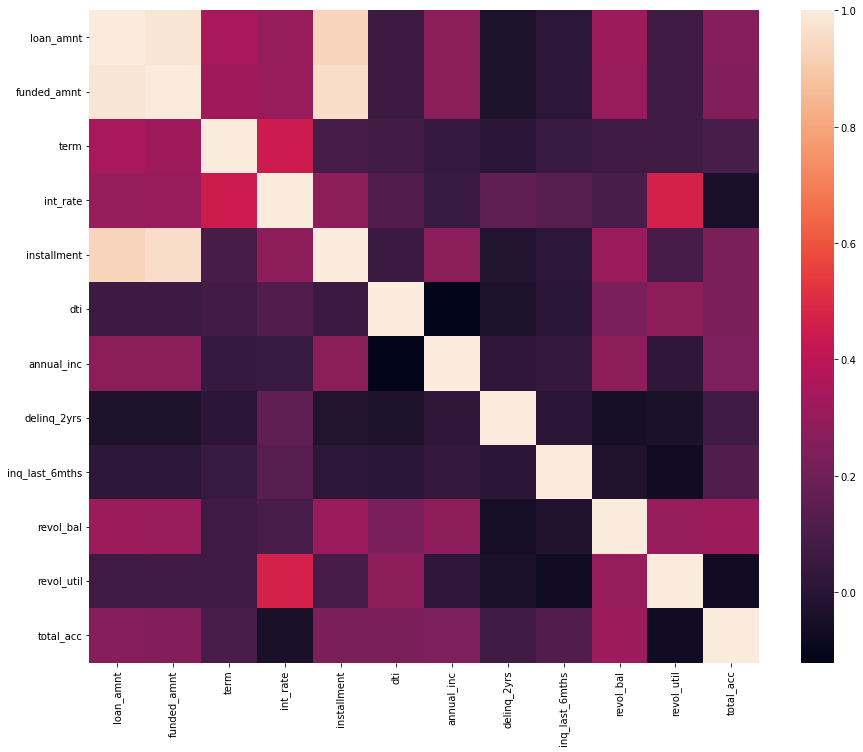

In [35]:
loan_corr = loan_df[['loan_amnt','funded_amnt','term','int_rate','installment','emp_length','dti','annual_inc','delinq_2yrs','inq_last_6mths','revol_bal','revol_util','total_acc']].corr()
plt.figure(figsize=[15,12])
sns.heatmap(loan_corr)
plt.show()

In [36]:
loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [37]:
loan_df.delinq_2yrs.unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

In [38]:
loan_df.earliest_cr_line.head()
# May be some drived metrics

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
5    Nov-04
Name: earliest_cr_line, dtype: object

In [39]:
loan_df.inq_last_6mths.unique()

array([1, 5, 2, 3, 0, 4, 6, 7, 8], dtype=int64)

In [40]:
loan_df.revol_bal.unique()

array([13648,  1687,  2956, ..., 27185, 66033, 85607], dtype=int64)

In [41]:
loan_df.revol_util.unique()
# Requires formating, add code above

array([8.370e+01, 9.400e+00, 9.850e+01, ..., 4.963e+01, 4.000e-02,
       7.280e+00])

In [42]:
loan_df.total_acc.unique()

array([ 9,  4, 10, 37, 12, 11, 13,  3, 23, 34, 29, 28, 42, 14, 22, 38, 21,
       17,  7, 31, 44, 26, 16,  6, 18, 27, 25, 40, 35, 24,  8, 20, 15, 19,
       36, 51, 32, 30, 33, 46,  5, 61, 56, 50, 41, 79, 62, 43, 47, 53, 45,
       60, 55, 39, 52, 58, 54, 57, 49, 63, 48, 59, 77, 87, 75, 72, 64, 67,
       78, 76, 74, 66, 81, 90, 80, 71, 69, 73, 70, 68, 65,  2],
      dtype=int64)